In [1]:
%matplotlib inline
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# APS8 - Regressão e Intervalo de Confiança




**Questão 1**

*(Montgomery 6-1)*

A indústria de *fast food* precisa selecionar materiais biodegradáveis para produzir embalagens mais sustentáveis. É desejável que o material tenha um baixo fator $\kappa$ de condutividade térmico  (medido em W/mK). 

Uma abordagem para diminuir o $\kappa$ é reduzir a densidade do material (medida em $g/cm^3$ )

Assuma que é possível ajustar os dados por um modelo de regressão linear.


| y: Condutividade termal (W/mK)| x: Densidade de produto (g/cm3)|
|---|---|
|0.0480| 0.1750|
|0.0525| 0.2200|
|0.0540| 0.2250|
|0.0535| 0.2260|
|0.0570| 0.2500|
|0.0610| 0.2765|

Linhas separadas:

    condutividade = [0.0480, 0.0525, 0.0540, 0.0535, 0.0570, 0.0610]

    densidade = [0.1750, 0.2200, 0.2250, 0.2260, 0.2500, 0.2765]

Pede-se:

**a.** Estime o modelo de regressão encontrando $\hat{\beta_0}$ e $\hat{\beta_1}$ usandos a fórmula abaixos. 


$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_1} \bar{x}$$

e

$$\hat{\beta_1}= \frac{\sum\limits_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum\limits_{i=1}^{n}(y_{i}-\bar{y})^2} = \frac{S_{xy}}{S_{xx}} $$



**Dica:**  converta as listas em array do numpy. Desta forma **não vai precisar fazer loops.**

    x = np.array(condutividade)
    x_ = np.mean(x)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

condutividade = [0.0480, 0.0525, 0.0540, 0.0535, 0.0570, 0.0610]
x = np.array(condutividade)
xb = np.mean(x)

densidade = [0.1750, 0.2200, 0.2250, 0.2260, 0.2500, 0.2765]
y = np.array(densidade)
yb= np.mean(y)

## calcular sxx e sxy
sxy = ((x-xb)*(y-yb)).sum()
sxx = ((x-xb)**2).sum()
b1 = sxy/sxx
b0 = yb-b1*xb


print("b0 é: {:.2f}".format(b0))
print ("b1 é: {:.2f}".format(b1))

b0 é: -0.19
b1 é: 7.67


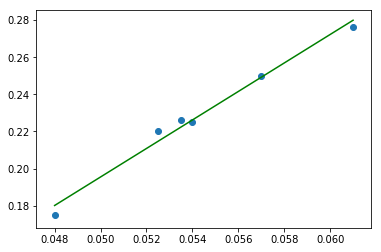

In [3]:
x_v = np.linspace(x.min(), x.max(), 600)
y_v = b0 + b1*x_v
plt.plot(x_v, y_v, color = "g") # regressão linear
plt.scatter(x, y) # dados


Por exemplo, a linha abaixo calcula $(x_i - \overline{x})^2$ para todo $x_i$ de uma vez:

    (x - x_)**2    


E a linha abaixo calcula $\sum\limits_{i=1}^{n}(x_{i}-\bar{x})$:

    np.sum((x - x_)**2)

In [4]:
x_ = np.mean(x)
np.sum((x - x_)**2)

9.583333333333332e-05

**b.** Agora use a biblioteca `statsmodels` para encontrar $\hat{\beta_0}$ e $\hat{\beta_1}$. Escreva a equação que estima *Condutividade termal* em função da *Densidade do produto*

In [5]:
import statsmodels.api as sm

xc = sm.add_constant(x)
modelo = sm.OLS(y, xc)
resultados = modelo.fit()
resultados.summary()

C:\Users\Beatriz\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     275.8
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           7.70e-05
Time:                        11:07:28   Log-Likelihood:                 25.097
No. Observations:                   6   AIC:                            -46.19
Df Residuals:                       4   BIC:                            -46.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1880      0.025     -7.471      0.002      -0.258      -0.118
x1             7.6696      0.462     16.608      0.000       6.387       8.952
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.461
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.469
Skew:                           0.065   Prob(JB):                        0.791
Kurtosis:                       1.636   Cond. No.                         251.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

o b0, (coef, constant) é -0.1880
o b0, (coef, x1) é 7,6696


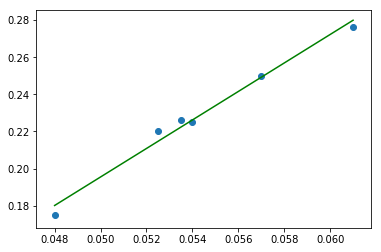

In [6]:
print("o b0, (coef, constant) é -0.1880")
print ("o b0, (coef, x1) é 7,6696")

### VERIFICAR SE É ISSO MESMO
x_vc = sm.add_constant(x_v)
y_vc = resultados.predict(x_vc)
plt.plot(x_v, y_vc, color="g") # regressão
plt.scatter (x, y) # dados

**c.** Calcule $SS_E$ (SQRes) e encontre a variância dos resíduos. Veja o formulário que foi fornecido.

$$SQRes=SS_{E}=\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2=\sum\limits_{i=1}^{n}\epsilon^2_{i}$$

In [7]:
e = y-(b0+b1*x)
SQRes = (e**2).sum()
SQRes

8.174456521739201e-05


**d.** Demonstre que $SQT = SQRes + SQReg$, ou, em outra notação,  que $SS_T = SS_R + SS_E$ . Ofereça uma explicação sucinta do que são SQT, SQRes e SQReg.

$$SQReg=SS_{R}=(\hat{y}_i-\bar{y})^2$$

$$SQT=SS_{T}=\sum\limits^{n}_{i=1}(y_i-\bar{y})^2$$

In [8]:
yi = b0 + b1*x
SQReg = ((yi-yb)**2)
SQT = ((y-yb)**2).sum()
print (SQT)
print( SQReg + SQRes)

0.0057188750000000035
[2.44116959e-03 2.79452618e-04 8.82803686e-05 1.22593336e-04
 5.00035983e-04 2.69606593e-03]



**e.**  Calcule o coeficiente de determinação $R^2$ . 

Faça um teste $t$ da significância estatística de $\hat{\beta_0}$ e $\hat{\beta_1}$ para um $\alpha=5\%$ . Deixe claras as hipóteses e forneça os níveis descritivos (*p-values*) dos resultados. 

**Dica:** 

Os valores $P > |t|$ que são dados no resultado da regressão são estes *p-values*

**e.** Para $x = 0.0540$ quanto vale o resíduo do modelo de regressão? Quanto da variação é explicada pela regressão?



In [9]:
r2=1-(SQReg/SQT) 
alpha = 0.05
x=0.054
r2

array([0.58743196, 0.96542886, 0.99885715, 0.9928572 , 0.92685774,
       0.5428609 ])

**Questão 2.**

*(Montgomery 12-9)*

Os dados abaixo são provenientes de uma pesquisa de satisfação aplicada em um hospital (**também estão disponíveis em [um arquivo CSV](tabela_pacientes.csv)**). 

|Observation| Age| Severity| Surg_Med| Anxiety| Satisfaction|
|---|---|---|---|---|---|
|1|55|50| 0| 2.1| 68|
|2|46|24| 1| 2.8| 77|
|3|30|46| 1| 3.3| 96|
|4|35|48| 1| 4.5| 80|
|5|59|58| 0| 2.0| 43|
|6|61|60| 0| 5.1| 44|
|7|74|65| 1| 5.5| 26|
|8|38|42| 1| 3.2| 88|
|9 |27|42| 0| 3.1| 75|
|10|51|50 |1 |2.4 |57 |
|11|53|38 |1 |2.2 |56|
|12|41|30 |0 |2.1 |88|
|13|37|31 |0 |1.9 |88|
|14|24|34 |0 |3.1 |102|
|15|42|30 |0 |3.0 |88|
|16|50|48 |1 |4.2 |70|
|17|58|61 |1 |4.6 |52|
|18|60|71 |1 |5.3 |43|
|19|62|62 |0 |7.2 |46|
|20|68|38 |0 |7.8 |56|
|21|70|41 |1 |7.0 |59|
|22|79|66 |1 |6.2 |26|
|23|63|31 |1 |4.1 |52|
|24|39|42 |0 |3.5 |83|
|25|49|40 |1 |2.1 |75|

As variáveis são:

* `Age` - a idade do paciente
* `Severity` - quão severa é a condição. Valores mais altos indicam condição mais preocupante
* `Surg-Med` - Indica se é um paciente de visita ao médico `0` ou cirurgia `1`
* `Anxiety` - Índice de ansiedade. Valores mais elevados indicam maior ansiedade

Pede-se:

In [10]:
dados=pd.read_csv('tabela_pacientes.csv')

In [11]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results


**a.** Encontre um modelo de regressão linear múltipla capaz de prever `Satisfaction` a partir da idade, severidade da condição e índice de ansiedade. Escreva a equação.

In [12]:
qt = dados[['Age','Severity','Anxiety']]
qtx = qt.copy()
reg = regress(qtx, dados.Satisfaction)
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Satisfaction   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     65.55
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           7.85e-11
Time:                        11:07:28   Log-Likelihood:                -82.074
No. Observations:                  25   AIC:                             172.1
Df Residuals:                      21   BIC:                             177.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.8952      5.898     24.399      0.000     131.631     156.160
Age           -1.1135      0.133     -8.398      0.000      -1.389      -0.838
Severity      -0.5849      0.132     -4.430      0.000      -0.860      -0.310
Anxiety        1.2962      1.056      1.227      0.233      -0.900       3.492
==============================================================================
Omnibus:                        4.204   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                2.444
Skew:                          -0.672   Prob(JB):                        0.295
Kurtosis:                       3.733   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**b.** Interprete os valores $P > |t|$ e a $Prob(\text{F-statistic})$ indique o que dizem a respeito da qualidade da regressão. Qual a hipótese nula que cada um testa?

###### Para Age:    

\begin{equation*}
   H_0:\mbox{Não tem relação com Satisfaction} \rightarrow \mu_B=\mu_A \rightarrow \mu_B-\mu_A=0
\end{equation*}   
\begin{equation*}
   H_a:\mbox{Tem relação com Satisfaction} \rightarrow \mu_B\neq\mu_A \rightarrow \mu_B-\mu_A\neq0
\end{equation*}


Ao analisar o $P > |t|$ e $Prob(\text{F-statistic})$ percebe-se que ambos são iguais ou muito próximos de zeros, respectivamente. Logo, a partir desses valores podemos rejeitar H0, e como podemos rejeitar H0, sabemos que a qualidadde da regressão é muito boa.

**c.** Por que é preciso supor que os resíduos do modelo de regressão seguem uma distribuição normal?


**d.** O que dizem os testes $Pr(Omnibus)$ e $Pr(JB)$ sobre a normalidade dos resíduos neste caso?


   **Questão 3**

*(Montgomery 8-34)*

Um artigo no *Journal of Composite Materials* (Dec. 1989, V. 23, p. 1200) descreve o efeito de delaminação na frequência natural de vibração de vigas feitas de materiais compósitos laminados. Cinco de tais vigas foram submetidas a cargas mecânicas, e as frequências encontradas (em hertz) foram as seguintes:

`230.66,  233.05,  232.58, 229.48, 232.58`

Pede-se:

**a.** Verifique se podemos considerar a distribuição de frequências naturais normal. (Dica: *probplot*)

**b.** Crie um intervalo de confiança de 95% para a média das frequências naturais.




In [23]:
freq_nat=[230.66,  233.05,  232.58, 229.48, 232.58]

((array([-1.12899754, -0.48565271,  0.        ,  0.48565271,  1.12899754]),
  array([229.48, 230.66, 232.58, 232.58, 233.05])),
 (1.6428315647972442, 231.67000000000002, 0.9324814697235373))

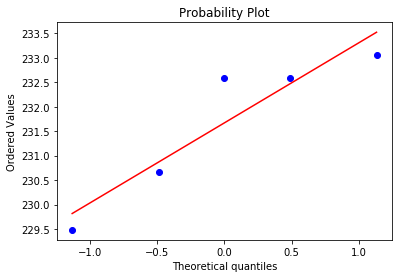

In [24]:
probplot(freq_nat, dist="norm", plot=plt)

$IC(\mu, \gamma) = [ \overline{X} - t_{\gamma/2}^{n-1} \frac{s}{\sqrt{n}}; \overline{X} + t_{\gamma/2}^{n-1} \frac{s}{\sqrt{n}} ]$

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, t
from math import sqrt


In [28]:
n = len(freq_nat)
t975 = t.ppf(0.5 + 0.95/2, df=n-1)
#calculando o s
freqO = np.mean(freq_nat)
s = np.std(freq_nat, ddof = 1)
I = freqO -((t975)*(s/sqrt(n)))
C = freqO +((t975)*(s/sqrt(n)))

print ("os intervalos de confiança é {0} e {1}".format(C,I))

os intervalos de confiança é 233.57108449507473 e 229.7689155049253


**Questão 4**

*(Montgomery 8-35)*

A agência governamental de meteorologia do governo australiano forneceu os valores de precipitação média para o período 1983-2002 ( [http://www.bom.gov.au/climate/change/rain03.txt](http://www.bom.gov.au/climate/change/rain03.txt) )

    499.2, 555.2, 398.8, 391.9, 453.4, 459.8, 483.7, 417.6, 469.2,
    452.4, 499.3, 340.6, 522.8, 469.9, 527.2, 565.5, 584.1, 727.3,
    558.6, 338.6

Pede-se:

**a.** Pode-se considerar os níveis de precipitação como vindo de uma distribuição normal?

**b.** Sabemos $\sigma$ ? 

**c.** Construa um intervalo de confiança de $95\%$ para a precipitação média anual de chuvas.


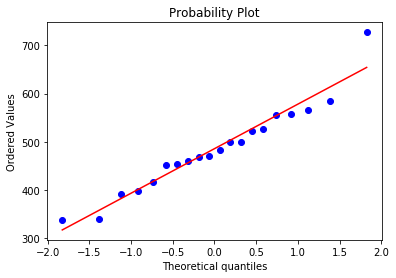

In [17]:
precipitacao = [499.2, 555.2, 398.8, 391.9, 453.4, 459.8, 483.7, 417.6, 469.2,
452.4, 499.3, 340.6, 522.8, 469.9, 527.2, 565.5, 584.1, 727.3,
558.6, 338.6]

probplot(precipitacao, dist="norm", plot=plt);

In [30]:
# não é possível saber
s = np.std(precipitacao, ddof = 1)
s

90.33871627322772